In [42]:

from prettytable import PrettyTable, ALL
import numpy as np
import matplotlib.pyplot as plt
from itertools import  combinations_with_replacement
import math
from mpl_toolkits.mplot3d import Axes3D
import random
import pandas as pd
%matplotlib inline

In [43]:
def length_of_design_matrix(m,d):
    return (math.factorial(m+d))/(math.factorial(m)*math.factorial(d))

In [44]:
def generate(m,data_point):
    lst = []
    for i in range(m+1):
        combination = combinations_with_replacement(data_point,i)
        s = [np.prod(comb) for comb in combination]
        lst = lst + s
    return lst

In [45]:
def design_matrix(n,m,D,Data_points):
    basis_func = np.zeros((n,D),dtype=np.float64)
    for i in range(n):
        basis_func[i] = generate(m,Data_points[i])
    return basis_func

In [46]:
def predict(weights,x,m):
    z = np.array(generate(m,x))
    z = z.reshape(-1,1)
    weights = (np.array(weights)).reshape(-1,1)
    x = np.transpose(z) @ weights
    return x[0][0]

In [47]:
def model(target,Data,m,D,Data_size,l):
    basis_func = design_matrix(Data_size,m,D,Data)
    x = np.linalg.inv((np.transpose(basis_func)@basis_func) + l*np.identity(D))
    weights = x @ np.transpose(basis_func) @ np.transpose(target)
    return weights

In [48]:
def error_rms(predicted, expected):
    
    x = [((predicted[i] - expected[i]) ** 2) for i in range(len(predicted))]
    
    return (np.mean(x)) ** 0.5

In [49]:
# Data Set 1
df = pd.read_csv('team10/dataset1/train_1b.csv')
data = []
target = []
for index, row in df.iterrows():
    data.append([row['X']])
    target.append(row['y'])

df = pd.read_csv('team10/dataset1/test.csv')
data_test = []
target_test = []
for index, row in df.iterrows():
    data_test.append([row['X']])
    target_test.append(row['y'])

df = pd.read_csv('team10/dataset1/validation.csv')   
data_valid=[]
target_valid=[]
for index, row in df.iterrows():
    data_valid.append([row['X']])
    target_valid.append(row['y'])


for m =  3  and lambda =  0 , Erms =  0.4116487321096376


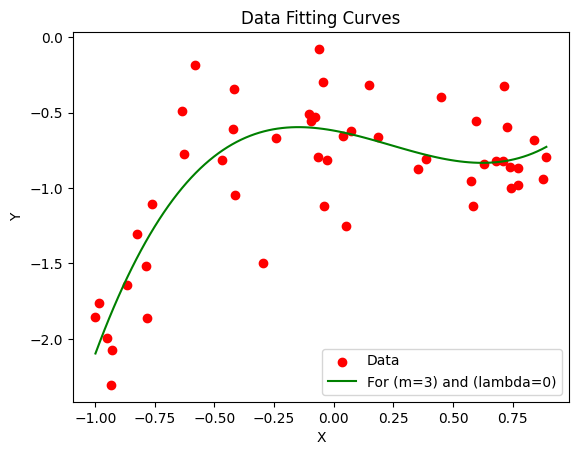

for m =  6  and lambda =  0 , Erms =  0.43148496542160936


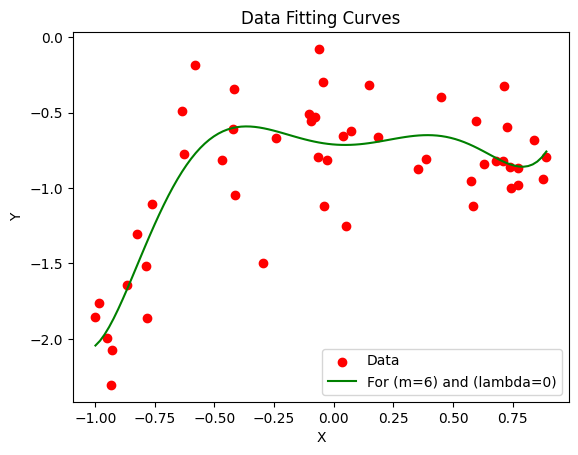

for m =  9  and lambda =  0 , Erms =  0.4480312159509601


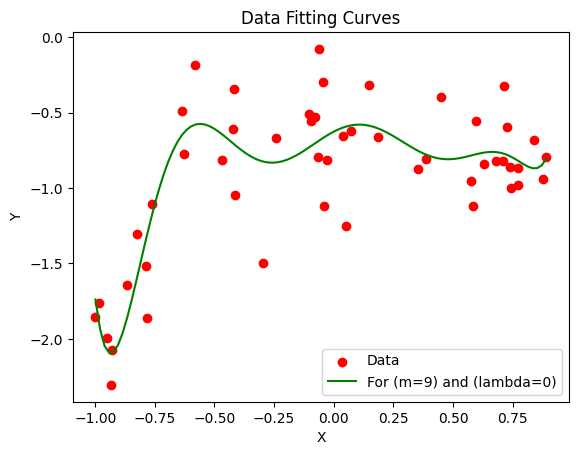

for m =  9  and lambda =  0.001 , Erms =  0.44162853228222726


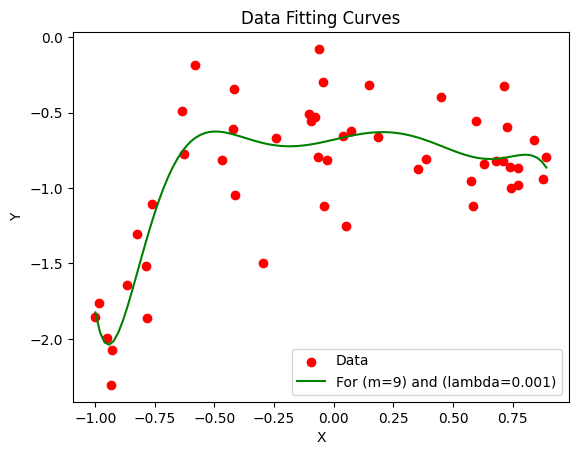

for m =  9  and lambda =  0.01 , Erms =  0.4195766518759562


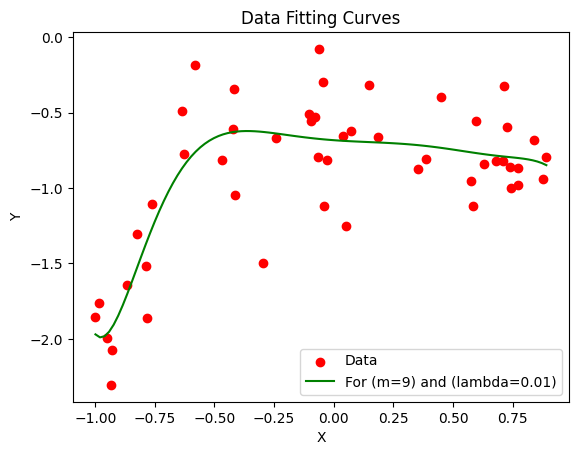

for m =  9  and lambda =  1 , Erms =  0.4453536829210038


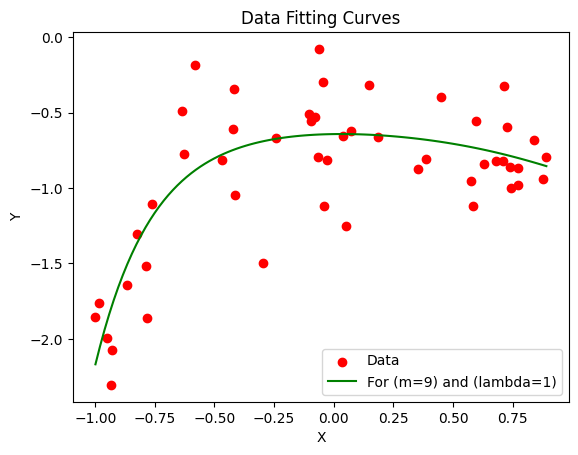

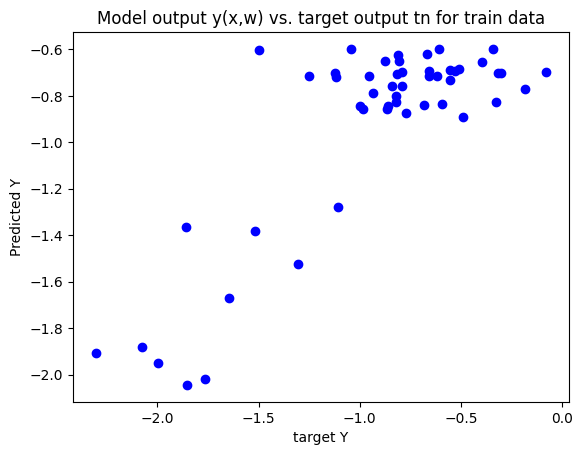

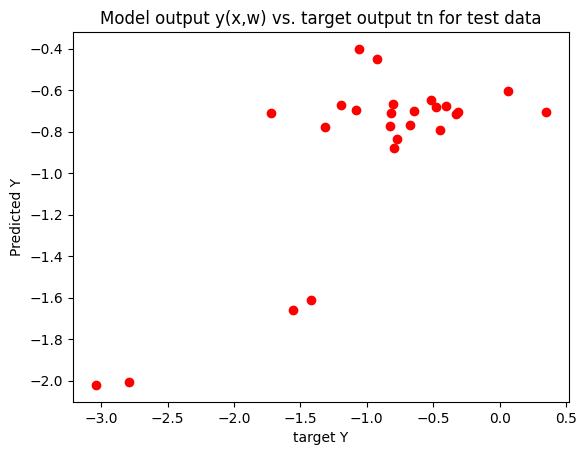

┼───┼───────┼─────────────────────┼─────────────────────┼─────────────────────┼
│ M │   λ   │      Erms_train     │      Erms_test      │   Erms_Validation   │
┼───┼───────┼─────────────────────┼─────────────────────┼─────────────────────┼
│ 3 │   0   │  0.3044735851312954 │  0.464704070374491  │  0.4116487321096376 │
┼───┼───────┼─────────────────────┼─────────────────────┼─────────────────────┼
│ 6 │   0   │  0.2941190061088188 │  0.5011538728858699 │ 0.43148496542160936 │
┼───┼───────┼─────────────────────┼─────────────────────┼─────────────────────┼
│ 9 │   0   │  0.2692156723711065 │  0.5806447259226141 │  0.4480312159509601 │
┼───┼───────┼─────────────────────┼─────────────────────┼─────────────────────┼
│ 3 │ 0.001 │ 0.30447363567075253 │  0.4647671578864051 │ 0.41172773416504604 │
┼───┼───────┼─────────────────────┼─────────────────────┼─────────────────────┼
│ 6 │ 0.001 │  0.2943617193509325 │ 0.48848594894210073 │  0.4269090464027528 │
┼───┼───────┼─────────────────────┼─────

In [50]:
#Plot for Data Set 1
model_orders = [3,6,9]
Data_size = len(data)
l=0
for m in model_orders:
    D=int(length_of_design_matrix(m,len(data[0])))
    weightsi = model(target,data,m,D,len(data),l)
    act_valid = []
    for x in data_valid:
        act_valid.append(predict(weightsi,x,m))
    print("for m = ",m," and lambda = ",l,", Erms = ",error_rms(act_valid,target_valid))
    flattened_data = np.concatenate(data)
    x_fit = np.linspace(min(flattened_data), max(flattened_data), 100) 
    y_fit = [predict(weightsi,[x],m) for x in x_fit]
    plt.scatter(data, target, color='red', label='Data')
    plt.plot(x_fit, y_fit,linestyle='-', color='g',label=f'For (m={m}) and (lambda={l})')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.title('Data Fitting Curves')
    plt.show()

m=9
for l in [0.001,0.01,1]:
    D=int(length_of_design_matrix(m,len(data[0])))
    weightsi = model(target,data,m,D,len(data),l)
    act_valid = []
    for x in data_valid:
        act_valid.append(predict(weightsi,x,m))
    print("for m = ",m," and lambda = ",l,", Erms = ",error_rms(act_valid,target_valid))
    flattened_data = np.concatenate(data)
    x_fit = np.linspace(min(flattened_data), max(flattened_data), 100) 
    y_fit = [predict(weightsi,[x],m) for x in x_fit]
    plt.scatter(data, target, color='red', label='Data')
    plt.plot(x_fit, y_fit,linestyle='-', color='g',label=f'For (m={m}) and (lambda={l})')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.title('Data Fitting Curves')
    plt.show()
m = 6
l = 0
D=int(length_of_design_matrix(m,len(data[0])))
weightsi = model(target,data,m,D,len(data),l)
act = []
for x in data:
    act.append(predict(weightsi,x,m))
plt.scatter(target, act, color='b',label =f'For (m={m}) and (lambda={l}')
plt.xlabel('target Y')
plt.ylabel('Predicted Y')
plt.title('Model output y(x,w) vs. target output tn for train data')
plt.show()
act_test =[]
for x in data_test:
    act_test.append(predict(weightsi,x,m))
plt.scatter(target_test, act_test, color='r',label =f'For (m={m}) and (lambda={l}')
plt.xlabel('target Y')
plt.ylabel('Predicted Y')
plt.title('Model output y(x,w) vs. target output tn for test data')
plt.show()

myTable = PrettyTable(["M","λ","Erms_train","Erms_test","Erms_Validation"])

Data_size = len(data)
for l in [0,0.001,0.1,1]:
    for m in [3,6,9]:
        D=int(length_of_design_matrix(m,len(data[0])))
        # print(D)
        weightsi = model(target,data,m,D,len(data),l)
        act = []
        for x in data:
            act.append(predict(weightsi,x,m))
        act_test =[]
        for x in data_test:
            act_test.append(predict(weightsi,x,m))
        act_valid = []
        for x in data_valid:
            act_valid.append(predict(weightsi,x,m))
        myTable.add_row([m,l,error_rms(act,target),error_rms(act_test,target_test),error_rms(act_valid,target_valid)])
        
        
myTable.hrules = ALL
myTable.horizontal_char = '─'  
myTable.vertical_char = '│'    
myTable.junction_char = '┼'  
print(myTable)

In [56]:
############ DATA SET 2 ###################
df = pd.read_csv('team10/dataset2/Train-2b-100.csv')
data = []
target = []
for index, row in df.iterrows():
    data.append([row['x1'],row['x2']])
    target.append(row['output'])# Convert the Series to a list and append it to 'data'

df = pd.read_csv('team10/dataset2/Test-50.csv')
data_test = []
target_test = []
for index, row in df.iterrows():
    data_test.append([row['x1'],row['x2']])
    target_test.append(row['output'])

df = pd.read_csv('team10/dataset2/Val-50.csv')   
data_valid=[]
target_valid=[]
for index, row in df.iterrows():
    data_valid.append([row['x1'],row['x2']])
    target_valid.append(row['output'])

4584.465594924173 : 2   0
1124.13893328397 : 4   0
8.844820303593691 : 6   0
8.7468476292334 : 6   0.001
9.660658701343651 : 6   0.1
92.74097469553382 : 6   1


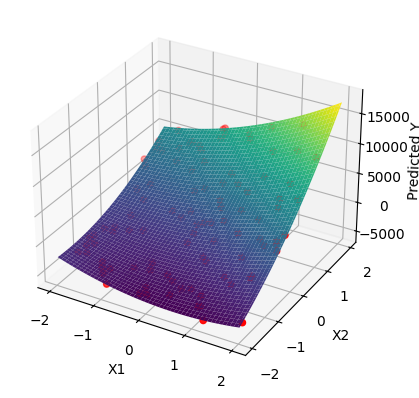

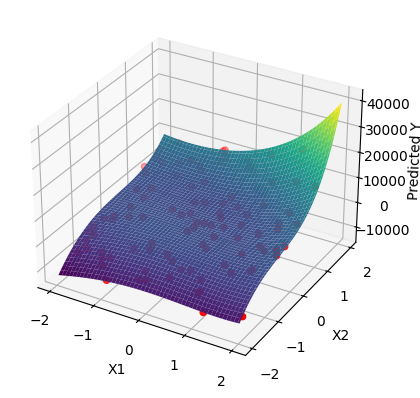

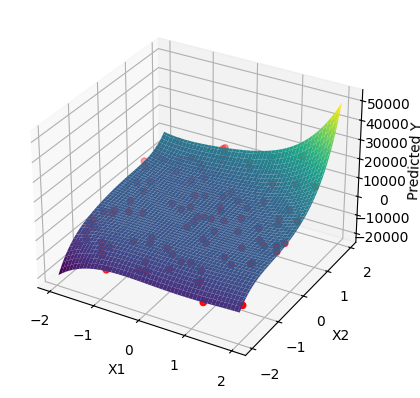

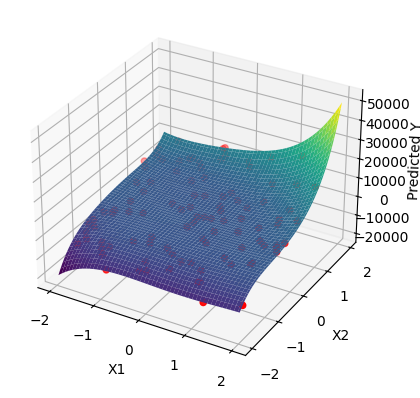

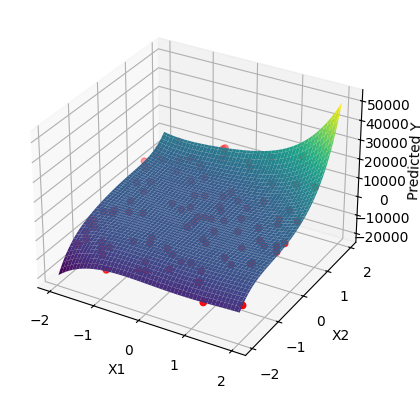

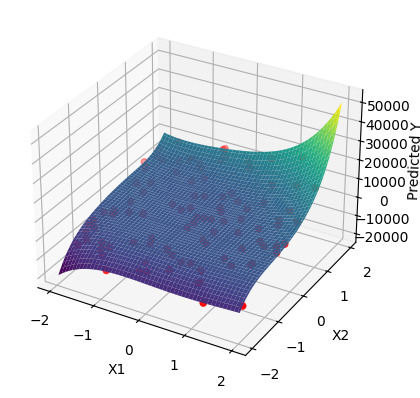

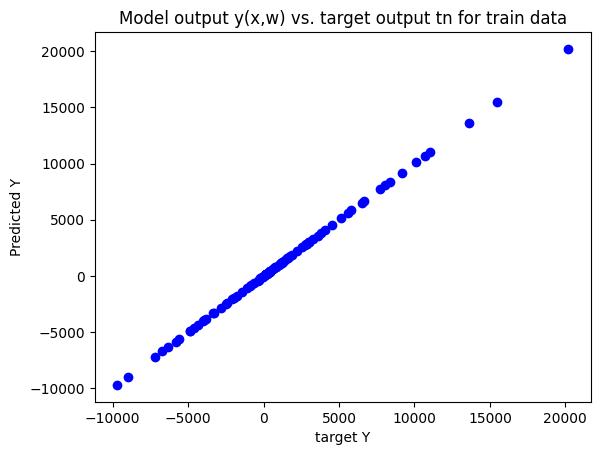

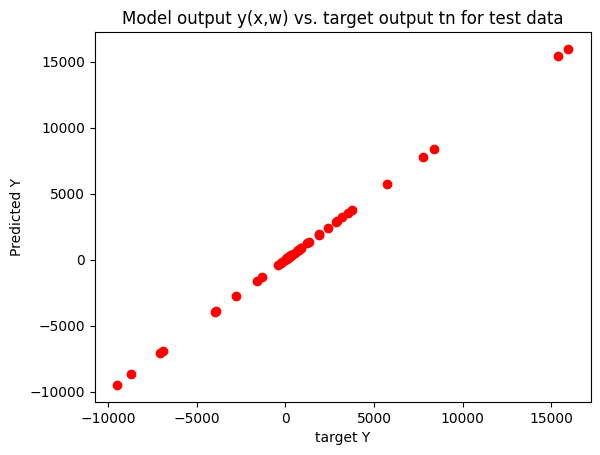

┼───┼───────┼────────────────────┼────────────────────┼────────────────────┼
│ M │   λ   │     Erms_train     │     Erms_test      │  Erms_Validation   │
┼───┼───────┼────────────────────┼────────────────────┼────────────────────┼
│ 2 │   0   │ 2021.7446533648488 │ 2244.7936391248013 │ 4584.465594924173  │
┼───┼───────┼────────────────────┼────────────────────┼────────────────────┼
│ 4 │   0   │ 437.4246440039868  │ 443.18871058406586 │  1124.13893328397  │
┼───┼───────┼────────────────────┼────────────────────┼────────────────────┼
│ 6 │   0   │ 9.281778037066294  │ 5.726074463090774  │ 8.844820303593691  │
┼───┼───────┼────────────────────┼────────────────────┼────────────────────┼
│ 2 │ 0.001 │ 2021.744653790887  │ 2244.7904572751822 │ 4584.489830298384  │
┼───┼───────┼────────────────────┼────────────────────┼────────────────────┼
│ 4 │ 0.001 │  437.424649278787  │ 443.17979310543495 │ 1124.2154781591469 │
┼───┼───────┼────────────────────┼────────────────────┼────────────────────┼

In [57]:

l=0
model_orders = [2,4,6]
for m in model_orders:
    
    D=int(length_of_design_matrix(m,len(data[0])))
        # print(D)
    weightsi = model(target,data,m,D,len(data),l)
    # ouput = []
    # for x in data:
    #     ouput.append(predict(weightsi,x,m))
    act_valid = []
    for x in data_valid:
        act_valid.append(predict(weightsi,x,m))
    print(error_rms(act_valid,target_valid),":",m," ",l)
    x1 = [d[0] for d in data]
    y1 = [d[1] for d in data]
    x = np.linspace(min(x1),max(x1),100)
    y = np.linspace(min(y1),max(y1),100)
    X,Y = np.meshgrid(x, y)
    Z = np.vectorize(lambda x, y: predict(weightsi, [x, y], m))(X, Y)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    Z1 = [predict(weightsi,x,m) for x in data]
    ax.scatter(x1, y1, Z1, color='r')
    ax.plot_surface(X, Y, Z, cmap = 'viridis',label=f'For (m={m}) and (lambda={l}')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Predicted Y')
m = 6
for l in [0.001,0.1,1]:
    D=int(length_of_design_matrix(m,len(data[0])))
        # print(D)
    weightsi = model(target,data,m,D,len(data),l)
    # ouput = []
    # for x in data:
    #     ouput.append(predict(weightsi,x,m))
    act_valid = []
    for x in data_valid:
        act_valid.append(predict(weightsi,x,m))
    print(error_rms(act_valid,target_valid),":",m," ",l)
    x1 = [d[0] for d in data]
    y1 = [d[1] for d in data]
    x = np.linspace(min(x1),max(x1),100)
    y = np.linspace(min(y1),max(y1),100)
    X,Y = np.meshgrid(x, y)
    Z = np.vectorize(lambda x, y: predict(weightsi, [x, y], m))(X, Y)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    Z1 = [predict(weightsi,x,m) for x in data]
    ax.scatter(x1, y1, Z1, color='r')
    ax.plot_surface(X, Y, Z, cmap = 'viridis',label=f'For (m={m}) and (lambda={l}')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Predicted Y')

# Add labels


# Show the plot
plt.show()

m = 6
l = 0.01
D=int(length_of_design_matrix(m,len(data[0])))
# print(D)
weightsi = model(target,data,m,D,len(data),l)
act = []
for x in data:
    act.append(predict(weightsi,x,m))
plt.scatter(target, act, color='b',label =f'For (m={m}) and (lambda={l}')
plt.xlabel('target Y')
plt.ylabel('Predicted Y')
plt.title('Model output y(x,w) vs. target output tn for train data')
plt.show()
act_test =[]
for x in data_test:
    act_test.append(predict(weightsi,x,m))
plt.scatter(target_test, act_test, color='r',label =f'For (m={m}) and (lambda={l}')
plt.xlabel('target Y')
plt.ylabel('Predicted Y')
plt.title('Model output y(x,w) vs. target output tn for test data')
plt.show()


myTable = PrettyTable(["M","λ","Erms_train","Erms_test","Erms_Validation"])

Data_size = len(data)
for l in [0,0.001,0.1,1]:
    for m in [2,4,6]:
        D=int(length_of_design_matrix(m,len(data[0])))
        # print(D)
        weightsi = model(target,data,m,D,len(data),l)
        act = []
        for x in data:
            act.append(predict(weightsi,x,m))
        act_test =[]
        for x in data_test:
            act_test.append(predict(weightsi,x,m))
        act_valid = []
        for x in data_valid:
            act_valid.append(predict(weightsi,x,m))
        myTable.add_row([m,l,error_rms(act,target),error_rms(act_test,target_test),error_rms(act_valid,target_valid)])
        
        
myTable.hrules = ALL
myTable.horizontal_char = '─'  
myTable.vertical_char = '│'    
myTable.junction_char = '┼'  
print(myTable)

In [58]:
############ DATA SET 3 ###################
df = pd.read_csv("team10/dataset3/train_data.csv")
data = []
target = []
for index, row in df.iterrows():
    lst = []
    for col in row:
        lst.append(col)
    data.append(lst) 
df = pd.read_csv("team10/dataset3/train_label.csv")
for index, row in df.iterrows():
    for col in row:
        target.append(col)
df = pd.read_csv('team10/dataset3/validation_data.csv')   
data_valid=[]
target_valid=[]
for index, row in df.iterrows():
    lst = []
    for col in row:
        lst.append(col)
    data_valid.append(lst)
df = pd.read_csv('team10/dataset3/validation_label.csv')
for index, row in df.iterrows():
    for col in row:
        target_valid.append(col)

df = pd.read_csv('team10/dataset3/test_data.csv')   
data_test=[]
target_test=[]
for index, row in df.iterrows():
    lst = []
    for col in row:
        lst.append(col)
    data_test.append(lst)
df = pd.read_csv('team10/dataset3/test_label.csv')
for index, row in df.iterrows():
    for col in row:
        target_test.append(col)

In [59]:
###################################   Error Plot for various values of M ################################
myTable = PrettyTable(["M","λ","Erms_train","Erms_test","Erms_Validation"])

model_orders = [2,3]
for l in [0,0.000001, 0.0001, 0.1]:
    for m in model_orders:
        D=int(length_of_design_matrix(m,len(data[0])))
        # print(D)
        weightsi = model(target,data,m,D,len(data),l)
        act = []
        for x in data:
            act.append(predict(weightsi,x,m))
        act_test =[]
        for x in data_test:
            act_test.append(predict(weightsi,x,m))
        act_valid = []
        for x in data_valid:
            act_valid.append(predict(weightsi,x,m))
        myTable.add_row([m,l,error_rms(act,target),error_rms(act_test,target_test),error_rms(act_valid,target_valid)])
        
myTable.hrules = ALL
myTable.horizontal_char = '─'  
myTable.vertical_char = '│'    
myTable.junction_char = '┼'  
print(myTable)



┼───┼────────┼────────────────────┼────────────────────┼────────────────────┼
│ M │   λ    │     Erms_train     │     Erms_test      │  Erms_Validation   │
┼───┼────────┼────────────────────┼────────────────────┼────────────────────┼
│ 2 │   0    │ 1.0204282663337378 │ 1.1395621696797342 │ 1.2071718930309072 │
┼───┼────────┼────────────────────┼────────────────────┼────────────────────┼
│ 3 │   0    │ 0.5284379967154954 │ 0.949751379579971  │ 0.8195912938762911 │
┼───┼────────┼────────────────────┼────────────────────┼────────────────────┼
│ 2 │ 1e-06  │ 1.0204282699123692 │ 1.1395531538019967 │ 1.207165704445024  │
┼───┼────────┼────────────────────┼────────────────────┼────────────────────┼
│ 3 │ 1e-06  │ 0.5291311867316586 │ 0.940201280827925  │ 0.8186792887364596 │
┼───┼────────┼────────────────────┼────────────────────┼────────────────────┼
│ 2 │ 0.0001 │ 1.0204590196869796 │ 1.1387546054045152 │ 1.2066137128744023 │
┼───┼────────┼────────────────────┼────────────────────┼────────

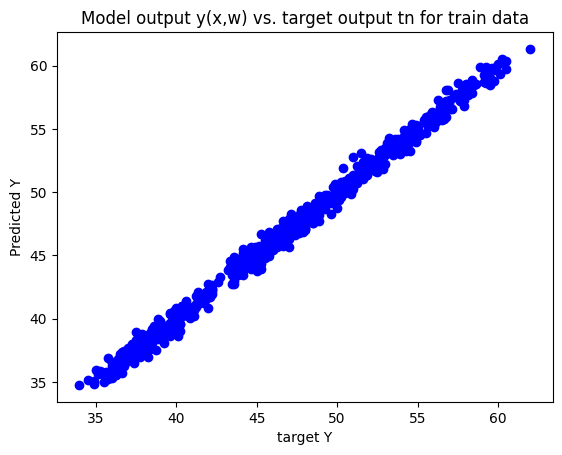

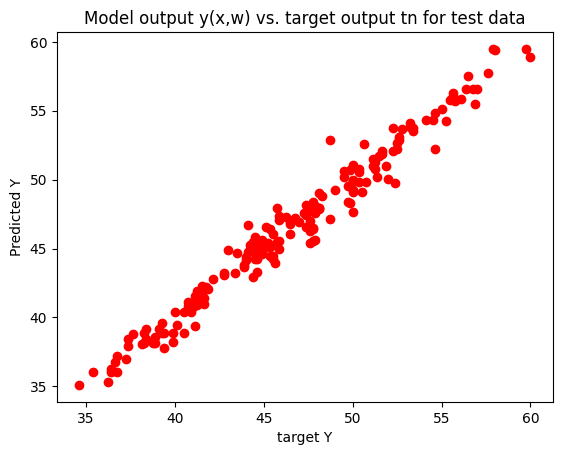

In [60]:
m = 3
l = 0.000001
D=int(length_of_design_matrix(m,len(data[0])))
# print(D)
weightsi = model(target,data,m,D,len(data),l)
act = []
for x in data:
    act.append(predict(weightsi,x,m))
plt.scatter(target, act, color='b',label =f'For (m={m}) and (lambda={l}')
plt.xlabel('target Y')
plt.ylabel('Predicted Y')
plt.title('Model output y(x,w) vs. target output tn for train data')
plt.show()
act_test =[]
for x in data_test:
    act_test.append(predict(weightsi,x,m))
plt.scatter(target_test, act_test, color='r',label =f'For (m={m}) and (lambda={l}')
plt.xlabel('target Y')
plt.ylabel('Predicted Y')
plt.title('Model output y(x,w) vs. target output tn for test data')
plt.show()